## <h1><center>5. Analysis of Gene Model</center></h1>

In [1]:
#### Parse exon coordinates of each transcript
from collections import OrderedDict

geneCord = OrderedDict()
GRCh38Exon = OrderedDict()
GRCh38UTR = OrderedDict()

with open('Homo_sapiens.GRCh38.86.gff3', 'rt') as f:
    for line in f:
        line = line.rstrip()
        if line.startswith('#'):
            continue
        
        lst = line.split('\t')
        
        if lst[-1].startswith('ID=gene'):
            geneInfo = lst[-1].split(';')
            geneName=geneInfo[1].split('=')[1]
            geneCord[geneName] = [int(lst[3]),int(lst[4])]
            GRCh38Exon[geneName] = OrderedDict()
            GRCh38UTR[geneName] = OrderedDict()
            
        elif lst[-1].startswith('ID=transcript'):
            trptInfo = lst[-1].split(';')
            trptName=trptInfo[2].split('=')[1]
            GRCh38Exon[geneName][trptName] = []
            GRCh38Exon[geneName][trptName].append(lst[6])
            GRCh38UTR[geneName][trptName] = []
            
        elif lst[2] == 'exon':
            GRCh38Exon[geneName][trptName].extend([int(lst[3]),int(lst[4])])
        
        elif lst[2] in ['three_prime_UTR','five_prime_UTR']:
            GRCh38UTR[geneName][trptName].extend([int(lst[3]),int(lst[4])])
            
            

In [2]:
geneCord['ANXA1']

[73151757, 73170393]

In [3]:
GRCh38Exon['ANXA1']

OrderedDict([('ANXA1-002',
              ['+',
               73151757,
               73151924,
               73158522,
               73158601,
               73158695,
               73158803,
               73159329,
               73159423,
               73160263,
               73160376,
               73160803,
               73160893,
               73162782,
               73162861,
               73163476,
               73163532,
               73165116,
               73165209,
               73166097,
               73166192,
               73167497,
               73167555,
               73169032,
               73169154,
               73170051,
               73170393]),
             ('ANXA1-005',
              ['+',
               73151865,
               73151924,
               73158522,
               73158601,
               73158695,
               73158803,
               73159329,
               73159879]),
             ('ANXA1-004',
              ['+',
     

In [4]:
GRCh38UTR['ANXA1']

OrderedDict([('ANXA1-002',
              [73151757, 73151924, 73158522, 73158535, 73170108, 73170393]),
             ('ANXA1-005', []),
             ('ANXA1-004', [73151865, 73151924, 73154198, 73154323]),
             ('ANXA1-006',
              [73151902, 73151924, 73154198, 73154340, 73158522, 73158535]),
             ('ANXA1-003', [73157654, 73158535, 73170108, 73170393]),
             ('ANXA1-008', []),
             ('ANXA1-007', []),
             ('ANXA1-001', [])])

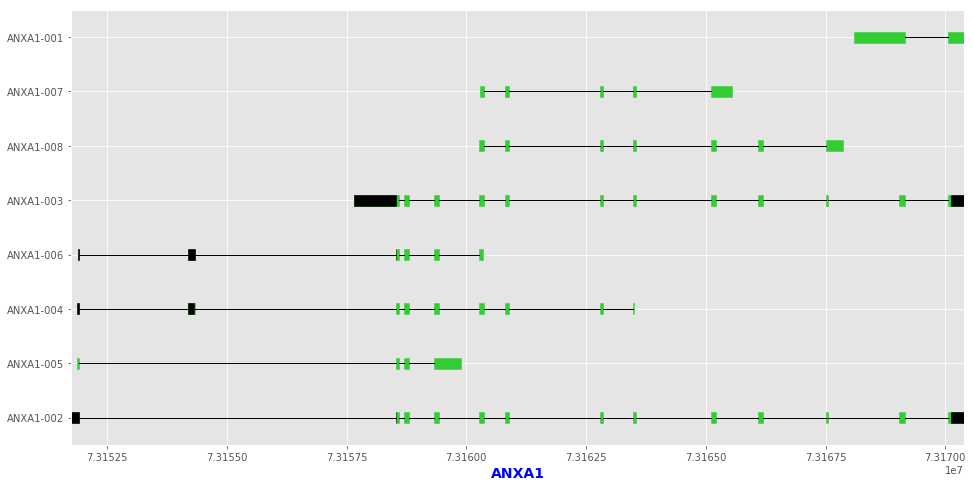

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
matplotlib.style.use('ggplot')

%matplotlib inline

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

trptNum = 0
for trpt, exon in GRCh38Exon['ANXA1'].items():
    trptNum += 1
    if exon[0] == '+':
        col = 'limegreen'
    elif exon[0] == '-':
        col = 'magenta'

    for i in range(1,len(exon),2):
        ## draw exons [Rectangle((x,y), height, width)]
        rect = Rectangle((exon[i], trptNum-0.1), exon[i+1]-exon[i], 0.2, color=col, fill=True) 
        ax.add_patch(rect)
        
        ## add intron lines
        if i < len(exon)-2:
            ax.plot([exon[i+1],exon[i+2]], [trptNum, trptNum],color='black',linewidth=1)

trptNum = 0
for trpt, utr in GRCh38UTR['ANXA1'].items():
    trptNum += 1
    if utr == []:
        continue

    for j in range(0,len(utr),2):
        ## draw UTRs [Rectangle((x,y), height, width)]
        rect = Rectangle((utr[j], trptNum-0.1), utr[j+1]-utr[j], 0.2, color='black', fill=True) 
        ax.add_patch(rect)

        
ax.set_xlabel('ANXA1', color='blue', fontsize=14, fontweight='bold')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(1,trptNum+1)))
ax.set_yticklabels(GRCh38Exon['ANXA1'].keys())

plt.xlim(geneCord['ANXA1'])
plt.ylim([0.5,trptNum+0.5])


plt.show()

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
matplotlib.style.use('ggplot')

def gene_model(geneName):
    
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    
    trptNum = 0
    for trpt, exon in GRCh38Exon[geneName].items():
        trptNum += 1
        if exon[0] == '+':
            col = 'limegreen'
        elif exon[0] == '-':
            col = 'magenta'

        for i in range(1,len(exon),2):
            ## draw exons
            rect = Rectangle((exon[i], trptNum-0.1), exon[i+1]-exon[i], 0.2, color=col, fill=True)
            ax.add_patch(rect)
        
            ## add intron lines
            if i < len(exon)-2:
                intronLength = exon[i+2]-exon[i+1]
                #ax.plot([exon[i+1],exon[i+2]], [trptNum, trptNum],color='black',linewidth=1)
            
            
                ### arrow line indicating the strand information
                if exon[0] == '+':
                    if intronLength < 500:
                        ax.arrow(exon[i+1], trptNum, intronLength*0.9, 0, head_width=0.03, head_length=intronLength*0.1, 
                             fc='k', ec='k')
                    else:
                        ax.arrow(exon[i+1], trptNum, intronLength-50, 0, head_width=0.03, head_length=50, 
                             fc='k', ec='k')
                elif exon[0] == '-':
                    if intronLength < 500:
                        ax.arrow(exon[i+2], trptNum, -intronLength*0.9, 0, head_width=0.03, head_length=intronLength*0.1, 
                             fc='k', ec='k')
                    else:
                        ax.arrow(exon[i+2], trptNum, -intronLength+50, 0, head_width=0.03, head_length=50, 
                             fc='k', ec='k')
                
    
    ### fill utr region with black
    trptNum = 0
    for trpt, utr in GRCh38UTR[geneName].items():
        trptNum += 1
    
        if utr == []:
            continue

        for j in range(0,len(utr),2):
            ## draw utrs [Rectangle((x,y), height, width)]
            rect = Rectangle((utr[j], trptNum-0.1), utr[j+1]-utr[j], 0.2, color='black', fill=True) 
            ax.add_patch(rect)
            
    ax.set_xlabel(geneName, color='blue', fontsize=14, fontweight='bold')
    
    ax.yaxis.set_major_locator(ticker.FixedLocator(range(1,trptNum+1)))
    ax.set_yticklabels(GRCh38Exon[geneName].keys(), fontweight='bold')
    
    plt.xlim(geneCord[geneName])
    plt.ylim([0,trptNum+0.5])

    plt.show()

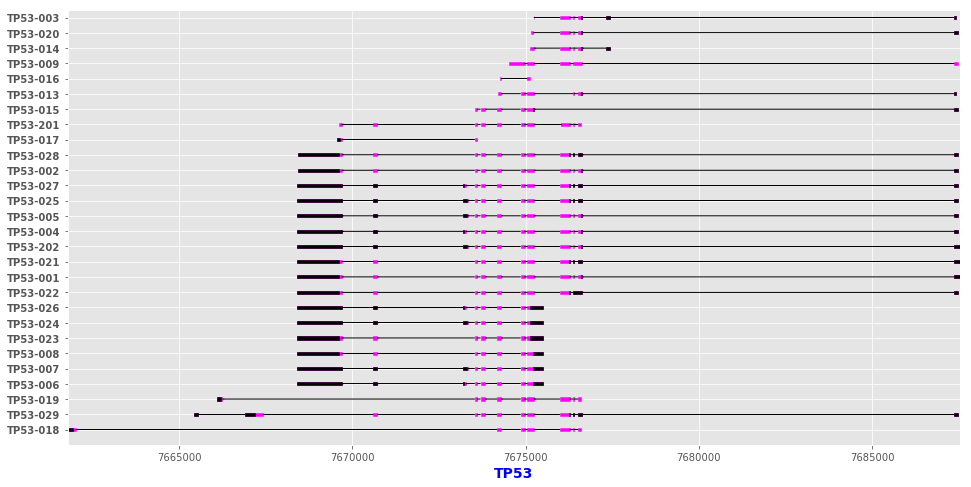

In [16]:
gene_model('TP53')